# Linear Regression and Gradient Descent from Scratch

## I. Concept

2D-equation to estimate the linear relationship between $x$ and $y$: 
$$\hat{y}=mx+b$$
Let $\epsilon = y-\hat{y}$. For $n$ data points, the **sum of square residue** is a **cost function** (an error metric) with the formula:
$$J=\sum^n_{i=1}\epsilon^2=\sum^n_{i=1}(y_i-(mx_i+b))^2$$

The goal is to find $m$ and $b$ such that $J$ is minimal. There are two main approaches: closed-form formula and iterative method. The first approach has been studied extensively over decades, however, it is usually computationally expensive. The second approach is more popular in machine learning since it is fast and easy to implement. The most basic and popular iterative method is **gradient descent**. 
Some time, a surface does not have a critical point (a surface is infinite in length and so it is not too hard to make up one). However, the surface make by our cost function J has a minimum point (since it is convex). We want to find the lowest location on surface J so that we minimize the eror between actuals and predictions. As the name suggests, gradient descent means moving downward. Gradient descent can converges to the minima very fast just by 2 steps: navigating the direction (**gradient**), and then walking toward it (**updating the location**). The distance for each move and the number of iteration are called **learning rate** and **epoch**, respectively.

* First, to find gradient, apply partial derivatives on J to obtain:
$$\nabla J(m,b)=\langle J_m(m,b),J_b(m,b) \rangle=\langle-2\sum_{i=1}^n x_i\epsilon_i, -2\sum_{i=1}^n\epsilon_i\rangle$$

* Next, we moving downward by repeatedly update the location. Use your great imagination on two formulas below and convince yourself why it works.

`current_m` = `old_m` $ -  (J_m(m,b))\cdot\text{ learning rate }$

`current_b` =  `old_b` $ - (J_b(m,b))\cdot\text{ learning rate }$


**Note:** learning rate $< 1$

## II. Code

$$𝐽_𝑚(𝑚,𝑏)=-2\sum_{i=1}^n x_i\epsilon_i=-2\sum_{i=1}^n x_i(y_i-\hat{y})=-2\sum_{i=1}^n x_i(y_i-(mx_i+b))$$

$$𝐽_b(𝑚,𝑏)=-2\sum_{i=1}^n \epsilon_i=-2\sum_{i=1}^n (y_i-\hat{y})=-2\sum_{i=1}^n (y_i-(mx_i+b))$$

In [272]:
def step_gradient(x_list, y_list,b_current, m_current, lr = .0001):
    J_b = 0
    J_m = 0
    for i in range(0, len(x_list)):
        x = x_list[i]
        y = y_list[i]
        J_b += -2*(y-((m_current*x)+b_current))
        J_m += -2*x*(y -((m_current*x)+b_current))
    new_b = b_current - (lr * J_b)
    new_m = m_current - (lr * J_m)
    return new_m,new_b

In [273]:
x_list=[1,3,5,6,9]
y_list=[10,25,35,60,90]
b = 0
m = 1

m1,b1=step_gradient(x_list,y_list,b, m) 

epoch=1000
for i in range(epoch):
    m,b=step_gradient(x_list,y_list,b, m) 

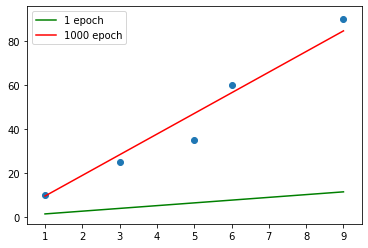

In [277]:
plt.plot(x_list,[m1*x+b1 for x in x_list ],'g',label="1 epoch")
plt.plot(x_list,[m*x+b for x in x_list ],'r',label="1000 epochs")
plt.scatter(x_list,y_list)
plt.legend()
plt.show()